# ISLP poly()
I was really confused about how this worked and why I got some very odd results when using poly() as I missed that it creates orthogonal polynomials. This results in very different regression coefficient values than when using the normal polynomials (with `raw=True`).

The second rookie mistake I did is that I mixed a regression done with poly(), with a prediction using raw polynomials. Mixing orthogonal things is never a good idea.

intercept                2889.979592
poly(x, degree=2)[0]    20241.733006
poly(x, degree=2)[1]     7894.497658
dtype: float64
intercept                         1.0
poly(x, degree=2, raw=True)[0]    1.0
poly(x, degree=2, raw=True)[1]    1.0
dtype: float64


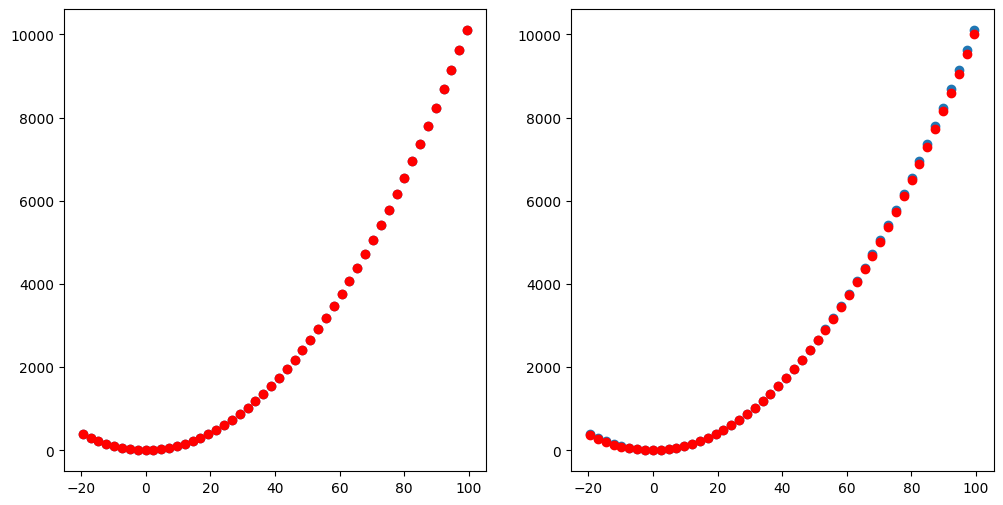

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, poly)
from matplotlib import pyplot as plt

xs = np.linspace(-20, 100)
ys = 1 + xs + xs ** 2
data = pd.DataFrame({'y': ys, 'x': xs})
X = MS([poly('x', 2)]).fit_transform(data, ys)
result_orth = sm.OLS(ys, X).fit()
print(result_orth.params)

X = MS([poly('x', 2, raw=True)]).fit_transform(data, ys)
result_raw = sm.OLS(ys, X).fit()
print(result_raw.params)

xs = np.linspace(-19.5, 99.5)
data = pd.DataFrame({'y': ys, 'x': xs})
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(xs, ys)
X = MS([poly('x', 2)]).fit_transform(data, ys)
Y_hat = result_orth.predict(X)
ax[0].scatter(xs, Y_hat, color='red')


ax[1].scatter(xs, ys)
X = MS([poly('x', 2, raw=True)]).fit_transform(data, ys)
Y_hat = result_raw.predict(X)
ax[1].scatter(xs, Y_hat, color='red')
